# BioML: Model Training Experiment - KNN

Computational Identification of Protein Phosphorylation Sites

In [6]:
import sys
import os

# To import lib from grandparent directory
current_dir = os.getcwd()
grandparent_dir = os.path.abspath(os.path.join(current_dir, "../../"))
sys.path.append(grandparent_dir)

In [7]:
from lib import encoder, evaluate
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### Hyperparameters

In [8]:
k = 3
train_test_split_test_size = 0.2

### Loading data

In [9]:
# Seqs = encoder.Encoder("../../dataset/31mer/test/positive_cd_hit50.test.fasta",
#                        "../../dataset/31mer/test/negative_cd_hit50.test.fasta",
#                        balance=True, upsample=True)
Seqs = encoder.Encoder("../../dataset/31mer/provided_by_TA/positive_clustered_sequences.fasta",
                       "../../dataset/31mer/provided_by_TA/negative_clustered_sequences.fasta",
                       balance=True, upsample=True)

### Encoding

In [10]:
posOneHot, negOneHot = Seqs.ToOneHot()

X_data, y_data = encoder.GetLebel(posOneHot, negOneHot)
X_data = np.array(X_data)
y_data = np.array(y_data)
print(X_data.shape, y_data.shape)

(65325, 31, 20) (65325,)


### Train-test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=train_test_split_test_size, random_state=87)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(52260, 31, 20) (52260,) (13065, 31, 20) (13065,)
(52260, 620) (52260,) (13065, 620) (13065,)


In [12]:
model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

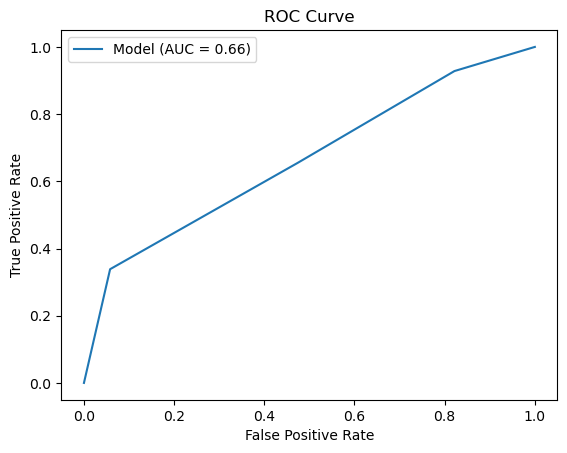

Best threshold: 0.6666666666666666
Accuracy: 0.42265595101416
Classification report:
              precision    recall  f1-score   support

           0       0.52      0.66      0.58      7894
           1       0.10      0.06      0.07      5171

    accuracy                           0.42     13065
   macro avg       0.31      0.36      0.33     13065
weighted avg       0.35      0.42      0.38     13065

Confusion matrix:
[[5222 2672]
 [4871  300]]


In [13]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 0]
evaluate.Evaluation(y_test, y_proba)

In [4]:
from aaindex import aaindex1

indices = aaindex1.record_codes()
aaindex1[indices[0]]

{'category': 'observable',
 'correlation_coefficients': {'BUNA790102': '0.949'},
 'description': 'alpha-CH chemical shifts (Andersen et al., 1992)',
 'notes': '',
 'pmid': '1575719',
 'references': "Andersen, N.H., Cao, B. and Chen, C. 'Peptide/protein structure analysis using the chemical shift index method: upfield alpha-CH values reveal dynamic helices and aL sites' Biochem. and Biophys. Res. Comm. 184, 1008-1014 (1992)",
 'values': {'-': 0,
  'A': 4.35,
  'C': 4.65,
  'D': 4.76,
  'E': 4.29,
  'F': 4.66,
  'G': 3.97,
  'H': 4.63,
  'I': 3.95,
  'K': 4.36,
  'L': 4.17,
  'M': 4.52,
  'N': 4.75,
  'P': 4.44,
  'Q': 4.37,
  'R': 4.38,
  'S': 4.5,
  'T': 4.35,
  'V': 3.95,
  'W': 4.7,
  'Y': 4.6}}